In [1]:
import numpy as np
from obspy import UTCDateTime
import obspy as obs
from obspy.clients.fdsn import Client as FDSN_Client
import numpy as np
from matplotlib import pyplot as plt
import sys
from ground_motion_qh import extract_pairs
from ground_motion_qh.catalog import Catalog
from ground_motion_qh.earthquake import EarthquakeCatalog
# import earthquake import EarthquakeCatalog
from pathlib import Path
from ground_motion_qh.get_waveforms import get_stream_multiple_stations, raw_stream_to_amplitude_and_times
    

In [2]:
earquake_metadata = {
    "starttime": '2008-01-01',
    "endtime": '2012-01-01',
    "latitude_range": [33,34],
    "longitude_range": [-117,-116],
    "minimum_magnitude": 2.0, 
}

np.save('All_magnitude_latlon_minmag2.0_metadata.npy',earquake_metadata)

station_metadata = dict(
    stname = ["SND"],
    network = "AZ",
    org = "IRIS",
)

In [10]:
earthquakes = EarthquakeCatalog(
    filename="All_magnitude_latlon_minmag2.0.csv",
    kwargs=earquake_metadata,
    reload=False
)

/home/yiwasak2/QuakeHack/GroundMotion_QH/ground_motion_qh/earthquake.py:218: UserWarning: Using existing All_magnitude_latlon_minmag2.0.csv
  warnings.warn(f"Using existing {filename}")


In [11]:
print(earthquakes[10])

Unnamed: 0                               10
id                                      125
time          2009-04-09 20:23:09.058571171
pstime                                 4.91
mag                                2.898642
lat                               33.801952
lon                               -116.6129
depth                                   0.0
Name: 10, dtype: object


<Axes: xlabel='Time', ylabel='mag'>

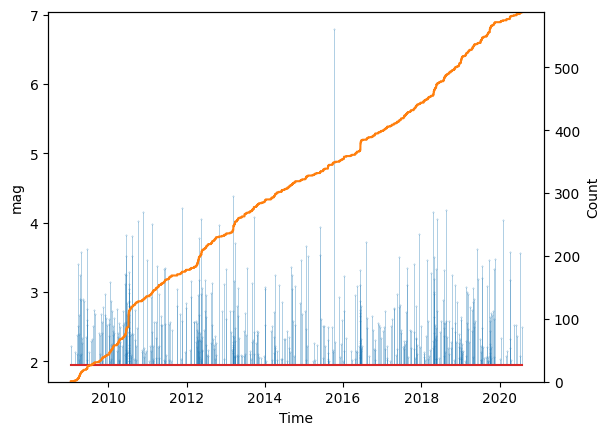

In [12]:
earthquakes.plot_time_series()

In [13]:
event_time_window = 30 # seconds (also we refer to this as tw-)
buffer = 0
forecast_time_window = 60*60 # seconds (also we refer to this as tw+)


In [ ]:
A_pre = []
A_post = []

for i, t0 in enumerate(earthquakes.catalog.time):
    print(f"Dowloading event {i}")
    
    try:
        stream_dict = get_stream_multiple_stations(
            t1=UTCDateTime(t0),
            t2=UTCDateTime(t0 + np.timedelta64(event_time_window, "s")),
        )

        a_trigger, _ = raw_stream_to_amplitude_and_times(stream_dict["SND"])
        stream_dict["SND"].plot()
        stream_dict = get_stream_multiple_stations(
            t1=UTCDateTime(t0 + np.timedelta64(event_time_window + buffer, "s")),
            t2=UTCDateTime(t0 + np.timedelta64(event_time_window + buffer + forecast_time_window, "s")),
        )
        a_forecast, _ = raw_stream_to_amplitude_and_times(stream_dict["SND"])
        
        A_pre.append(a_trigger)
        A_post.append(a_forecast)
        
    except Exception as e:
        print(f"Error dowloading event {i}: {e}")
        A_pre.append(np.array([]))
        A_post.append(np.array([]))
        
        continue

Dowloading event 0


Dowloading event 1
Dowloading event 2


In [ ]:
a_forecast_max = np.array([np.max(np.abs(a-np.mean(a))) for a in A_post if np.any(a)])
a_trigger_max = np.array([np.max(np.abs(a-np.mean(a))) for a in A_pre if np.any(a)])


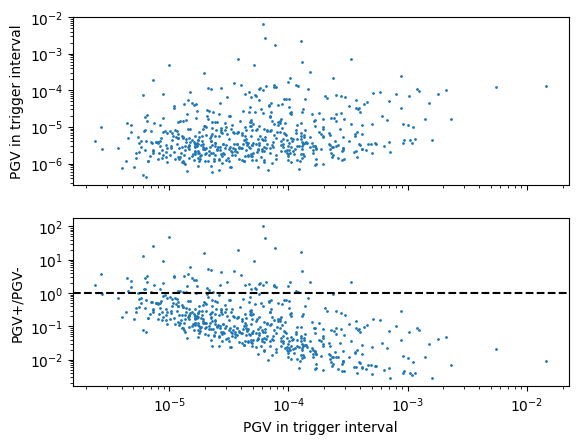

In [ ]:
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].scatter(a_trigger_max, a_forecast_max, s=1)
ax[0].set(
    ylabel="PGV in trigger interval",
    yscale="log",
)

ax[1].scatter(a_trigger_max, a_forecast_max/a_trigger_max, s=1)
ax[1].set(
    xlabel="PGV in trigger interval",
    ylabel="PGV+/PGV-",
    yscale="log",
    xscale="log",
)
ax[1].axhline(1, color="k", linestyle="--")
fig.savefig('RatioAmp.pdf')

In [ ]:
np.mean(a_forecast_max/a_trigger_max>1)

np.float64(0.11965811965811966)

In [ ]:
# save a_forecast_max and a_trigger_max
np.save("a_forecast_max.npy", a_forecast_max)
np.save("a_trigger_max.npy", a_trigger_max)

In [ ]:
print(a_forecast_max.size)
#print(a_forecast_max)
print(a_trigger_max.size)
print(a_trigger_max)

585
585
[1.79018177e-05 2.03521683e-05 2.99180782e-05 1.36721206e-05
 3.58577213e-04 2.31563946e-05 5.04419445e-05 2.43561105e-05
 3.32903197e-05 1.63614237e-05 1.18607548e-04 1.85870190e-04
 1.18873305e-03 1.03019758e-04 7.06029877e-06 2.72134826e-05
 1.79181175e-05 1.15238523e-04 3.41225441e-05 1.35668672e-05
 2.14180536e-05 5.90834515e-04 1.47916229e-05 4.67138801e-05
 8.71615421e-05 5.02638789e-06 6.41588205e-06 7.34503193e-05
 6.57230516e-05 4.36962427e-05 2.78792288e-04 1.31378808e-05
 1.97657917e-05 3.32839769e-05 6.39934806e-05 5.67447823e-05
 6.90329172e-05 8.33878730e-06 5.50780711e-05 6.25185842e-05
 1.16009712e-04 3.97957764e-05 3.22773779e-05 1.27624030e-04
 1.28471502e-05 3.70903457e-06 1.10993344e-05 4.81315010e-05
 3.22965630e-05 2.34535779e-05 8.82530155e-05 4.08363246e-05
 2.51759690e-04 3.14215716e-05 3.40974849e-05 8.50522166e-05
 1.81790346e-05 2.17829088e-05 6.33075327e-05 6.16533561e-05
 5.72840031e-05 1.74448357e-05 6.01462275e-06 3.35662823e-05
 3.03205151e-05 